In [1]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

from copy import deepcopy

In [2]:
from dataset.dataloader import train_dl, test_dl, val_dl
from auto_encoder.model import AutoEncoder

In [3]:
images, labels = next(iter(train_dl))

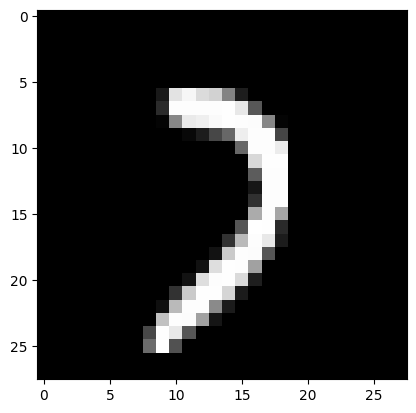

In [4]:
for i in range(4):
    plt.imshow(images[i].squeeze(), cmap="gray")

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoEncoder(images.shape[1]).to(device)

In [6]:
EPOCHS = 100
lr = 0.00001
loss_func = torch.nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
train_loss_per_epoch = []
valid_loss_per_epoch = []
counter = 0
best_model = None

for epoch in range(EPOCHS):
    print("Epoch: [{}/{}]".format(epoch+1, EPOCHS))
    train_loss = []
    val_loss = []
    for X, y in tqdm(train_dl):
        X = X.to(device)
        rec_X = model(X)
        loss = loss_func(X, rec_X)
        train_loss.append(loss.item())
        loss.backward()
        optim.step()

    for X, y in tqdm(val_dl):
        with torch.no_grad():
            X = X.to(device)
            rec_X = model(X)
            loss = loss_func(X, rec_X)
            val_loss.append(loss.item())
    
    train_loss_per_epoch.append(sum(train_loss)/len(train_loss))
    valid_loss_per_epoch.append(sum(val_loss)/len(val_loss))

    if valid_loss_per_epoch[-1] == min(valid_loss_per_epoch):
        counter = 0
        best_model = deepcopy(model)
    
    else:
        counter += 1

    print("\tTrain loss: {}".format(train_loss_per_epoch[-1]))
    print("\t  Val loss: {}".format(valid_loss_per_epoch[-1]))

    if counter == 10:
        print("\nEarly stop: model is not converging")
        break

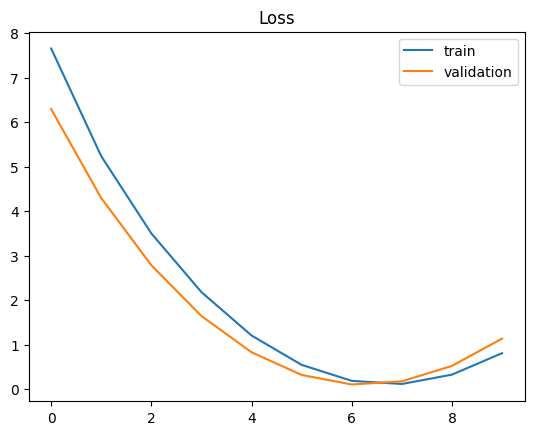

In [ ]:
plt.plot(train_loss_per_epoch, label="train")
plt.plot(valid_loss_per_epoch, label="validation")
plt.legend()
plt.title("Loss")

plt.show()

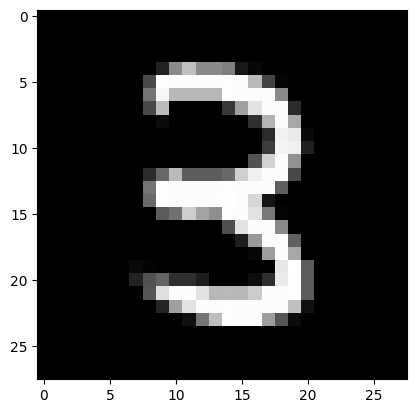

In [ ]:
plt.imshow(images[0].squeeze(), cmap="gray")

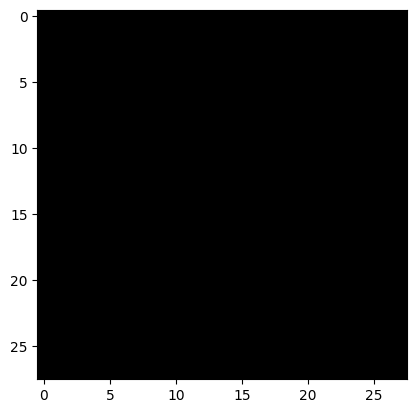

In [ ]:
with torch.no_grad():
    rec = best_model(images.to(device))
plt.imshow(rec[0].squeeze().cpu(), cmap="gray")